## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import pleiades as ple
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_columns=110
pd.options.display.max_rows=300

### Load user data

In [2]:
import_path = r'..\data\#michellewilliams_users_clean.csv'
df = pd.read_csv(import_path, index_col=0)

import_path = r'..\data\replies_to_jk_rowling_users_clean.csv'
df2 = pd.read_csv(import_path, index_col=0)

In [3]:
df.head()

,name_and_description,conservative
0,Boris Is My Prime Minister ✡ ️ 🇬🇧,1.0
1,🇺🇸 🇺🇸 Red Blooded All American 🌾 Heartland bo...,1.0
2,Indian singer Army brat Muay Thai panda Horse ...,0.0
3,Christian SC Gamecocks College Football Outdoo...,1.0
4,Mother of Amma to love my kids love my grandki...,1.0


In [4]:
df = df.fillna('')

Plot pie chart.

Text(0, 0.5, '')

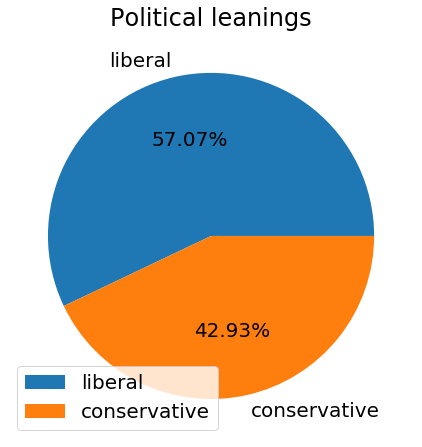

In [5]:
fig, ax = plt.subplots(figsize=(10, 7.5))
plt.rc('font', size=20)
df['conservative'].value_counts().plot(kind='pie', title='Political leanings', labels=['liberal', 'conservative'], autopct='%.2f%%')
plt.legend(loc='lower left')
plt.ylabel('')

In [6]:
X = df['name_and_description'][:]

Plot wordclouds

In [7]:
cz = ple.CZ()

In [8]:
X_l = df[df['conservative'] == 0]
X_l = X_l['name_and_description']
X_c = df[df['conservative'] == 1]
X_c = X_c['name_and_description']

In [11]:
mask = r'..\images\cloud mask.png'

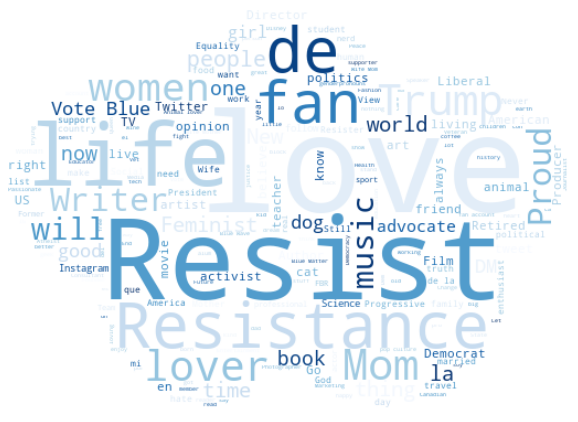

In [12]:
full_text = ' '.join(X_l)
export_path = r'..\images\liberal_wordcloud.png'
cz.word_cloud(full_text, background_color='white', colormap='Blues', mask=mask, export_path=export_path)

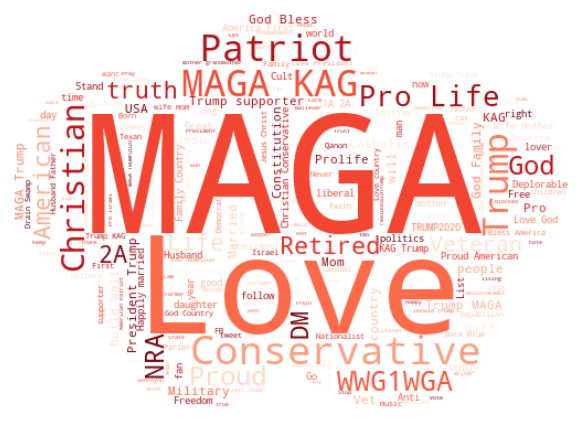

In [14]:
full_text = ' '.join(X_c)
export_path = r'..\images\conservative_wordcloud.png'
cz.word_cloud(full_text, background_color='white', colormap='Reds', mask=mask, export_path=export_path)

In [8]:
cvec = CountVectorizer(max_df=0.5, max_features=5000, min_df=1, ngram_range=(1, 2), stop_words='english', token_pattern=r'([^\s]+)')
X_cvec = cvec.fit_transform(X)
X_cvec = pd.DataFrame(X_cvec.toarray(), columns=cvec.get_feature_names())

In [9]:
print('CountVectorizer:')
print(X_cvec.sum().sort_values(ascending=False)[:10])
print()

CountVectorizer:
️        2117
🇺🇸       1962
trump    1074
maga     1048
love      839
⭐         807
❤         600
⭐ ️       554
life      549
kag       534
dtype: int64



Remove blank feature

In [14]:
X_cvec = X_cvec[X_cvec.sum().sort_values(ascending=False).index[1:]]

In [18]:
print(X_cvec.sum().sort_values(ascending=False)[:10])

🇺🇸       1962
trump    1074
maga     1048
love      839
⭐         807
❤         600
⭐ ️       554
life      549
kag       534
god       482
dtype: int64


C:\Users\admin\.conda\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\.conda\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56826 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\.conda\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\.conda\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\.conda\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\.conda\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:180: Ru

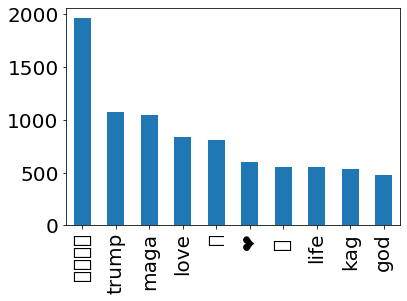

In [31]:
fig, ax = plt.subplots()
X_cvec.sum().sort_values(ascending=False)[:10].plot(kind='bar')